#  Assumptions of Linear Regression
1. Linearity
2. Normality of residuals
3. Homoscedasticity(Constant variance)
4. No autocorrelation (Correlation of error terms)
5. Multicollinearity

## 1. Linearity
There should be linear relationship between independent variables and the dependent variable

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
x1 = np.random.rand(100,1) * 8 - 2.3
x2 = np.random.rand(100,1) * 8 - 2.3
z = x1**2 + x2**2 + .2*x1 + .2*x2 + 4 + np.random.rand(100,1)

df = pd.DataFrame()
df["x1"] = x1.reshape(100)
df["x2"] = x2.reshape(100)
df["y"] = z.reshape(100)

df.head()

,x1,x2,y
0,0.922675,-0.636642,6.311559
1,5.163285,-0.703414,32.300694
2,2.734257,2.936066,21.411436
3,2.126422,-0.038752,9.631729
4,-1.931301,2.089587,12.243911


###  1. Individual Scatter Plot

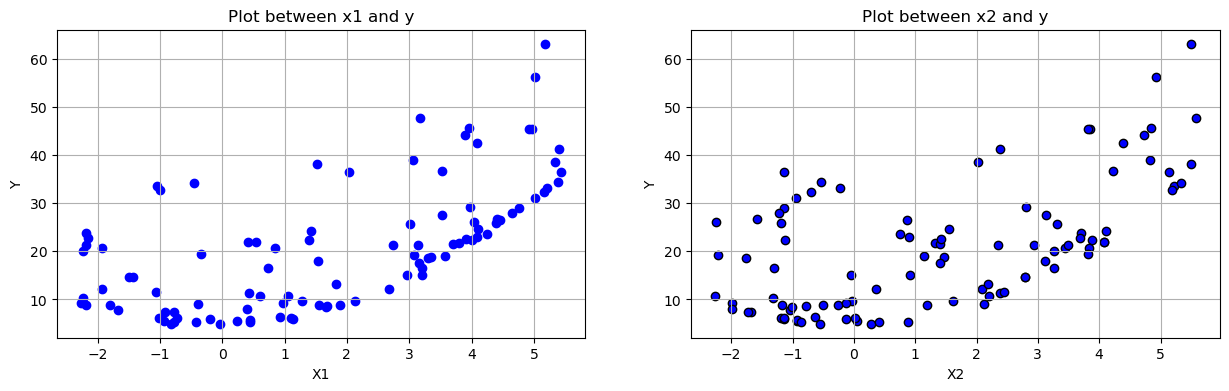

In [5]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))

ax1.scatter(data = df, x="x1",y="y",color="b",ec="blue")
ax1.set_title("Plot between x1 and y")
ax1.set_xlabel("X1")
ax1.set_ylabel("Y")
ax1.grid()

ax2.scatter(data = df, x="x2",y="y",color="blue",ec="black")
ax2.set_title("Plot between x2 and y")
ax2.set_xlabel("X2")
ax2.set_ylabel("Y")
ax2.grid()
plt.show()

###  2. Residual Plot

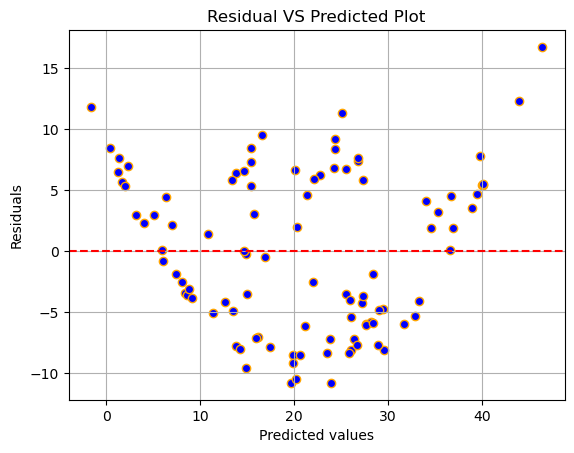

In [6]:
from sklearn.linear_model import LinearRegression

X = df[["x1","x2"]]
y = df["y"]

model = LinearRegression()
model.fit(X,y)

predicted_value = model.predict(X)
residuals = y - predicted_value

plt.scatter(predicted_value,residuals,c="blue",ec="orange")
plt.axhline(y=0,color="red",linestyle= "--")
plt.title("Residual VS Predicted Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.grid()
plt.show()

In [10]:
from scipy import stats

stats.normaltest(residuals)

NormaltestResult(statistic=17.991364354793006, pvalue=0.0001239438177868098)

###  Adding Polynomial Terms

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# fitting linear model
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

# calculating score
lin_r2 = r2_score(y_test,lin_model.predict(x_test))
lin_mse = mean_squared_error(y_test,lin_model.predict(x_test))

# adding polynomial terms
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly,y_train)

poly_r2 = r2_score(y_test,poly_model.predict(x_test_poly))
poly_mse = mean_squared_error(y_test,poly_model.predict(x_test_poly))

# Compare model performance
print("Linear model")
print(f"R-squared: {lin_r2:.4f}")
print(f"Mean Squared Error: {lin_mse:.4f}")

print("\nPolynomial model")
print(f"R-squared: {poly_r2:.4f}")
print(f"Mean Squared Error: {poly_mse:.4f}")

Linear model
R-squared: 0.7723
Mean Squared Error: 56.8342

Polynomial model
R-squared: 0.9996
Mean Squared Error: 0.1037


###  Making Linear
### 1. Applying Transformation

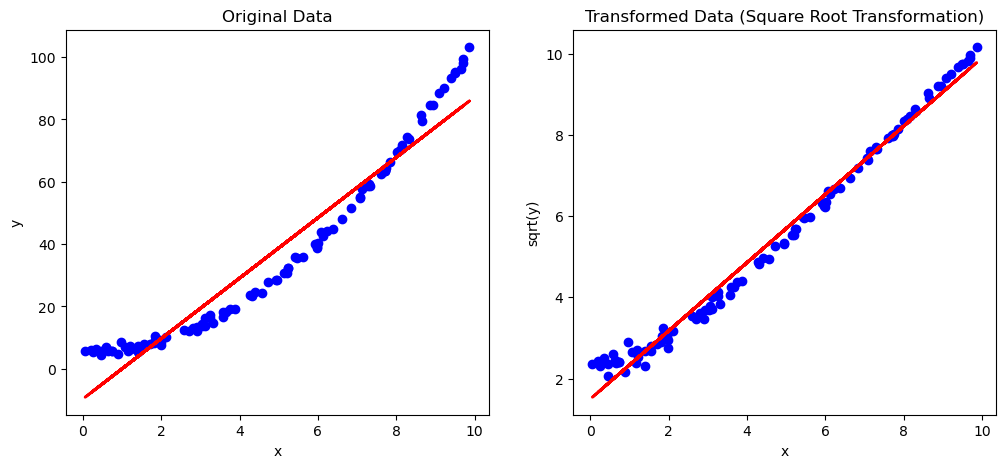

Original linear model
R-squared: 0.9344

Transformed linear model
R-squared: 0.9872


In [12]:
np.random.seed(42)
x = np.random.rand(100,1) * 10
y = x**2 + 5 + np.random.normal(0,1,(100,1))
y = np.abs(y)

# sqrt transformation
y_sqrt = np.sqrt(y)

# fitting both model
model1 = LinearRegression()
model1.fit(x,y)
model2 = LinearRegression()
model2.fit(x,y_sqrt)

# predictions
y_pred_original = model1.predict(x)
y_pred_transform = model2.predict(x)

# Visualize the relationship between x and y before and after transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before transformation
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_original, color='red', linewidth=2)
ax1.set_title('Original Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# After transformation
ax2.scatter(x, y_sqrt, color='blue')
ax2.plot(x, y_pred_transform, color='red', linewidth=2)
ax2.set_title('Transformed Data (Square Root Transformation)')
ax2.set_xlabel('x')
ax2.set_ylabel('sqrt(y)')

plt.show()

# Calculate R-squared and Mean Squared Error
r2_original = r2_score(y, y_pred_original)
r2_transformed = r2_score(y_sqrt, y_pred_transform)

# Compare the performance of the original and transformed models
print("===========================")
print("Original linear model")
print(f"R-squared: {r2_original:.4f}")

print("\nTransformed linear model")
print(f"R-squared: {r2_transformed:.4f}")
print("===========================")

###  Applying Polynomial Regression

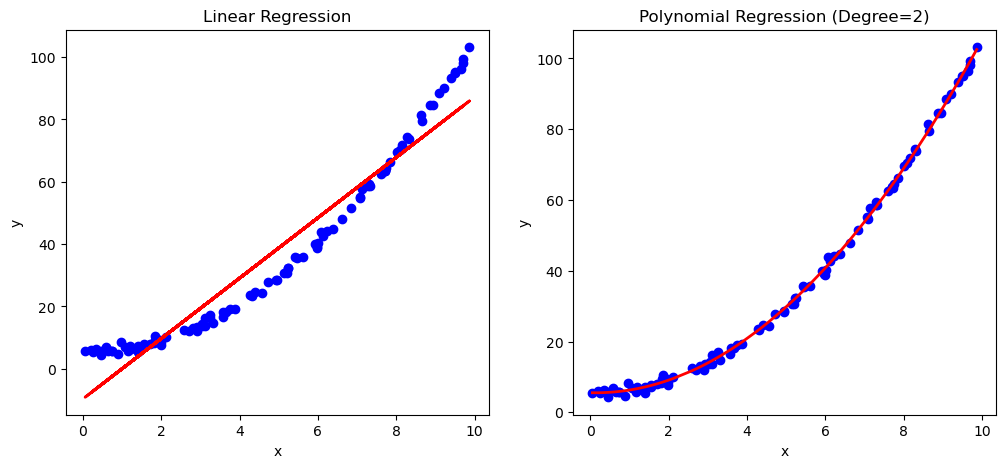

Linear model
R-squared: 0.9344

Polynomial regression model
R-squared: 0.9872


In [13]:
poly_featurs = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_featurs.fit_transform(x)
poly_model1 = LinearRegression()
poly_model1.fit(x_poly,y)
y_pred_poly = poly_model1.predict(x_poly)

# Visualize the relationship between x and y before and after transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before transformation
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_original, color='red', linewidth=2)
ax1.set_title('Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# After polynomial regression
ax2.scatter(x, y, color='blue')
ax2.plot(sorted(x[:,0]), y_pred_poly[np.argsort(x[:,0])], color='red', linewidth=2)
ax2.set_title('Polynomial Regression (Degree=2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

# Calculate R-squared and Mean Squared Error
r2_original = r2_score(y, y_pred_original)
r2_transformed = r2_score(y_sqrt, y_pred_transform)

# Compare the performance of the original and transformed models
print("===========================")
print("Linear model")
print(f"R-squared: {r2_original:.4f}")

print("\nPolynomial regression model")
print(f"R-squared: {r2_transformed:.4f}")
print("===========================")

## 2. Normality of Residuals
The error terms(residuals) are assumed to follow normal distribution with a mean 0 and a constant variance

###  Histogram and QQ Plot

In [14]:
x = np.random.rand(100,1)
y = 3*x + np.random.normal(0,5,(100,1))

model4 = LinearRegression()
model4.fit(x,y)
y_pred = model4.predict(x)

residuals = y - y_pred

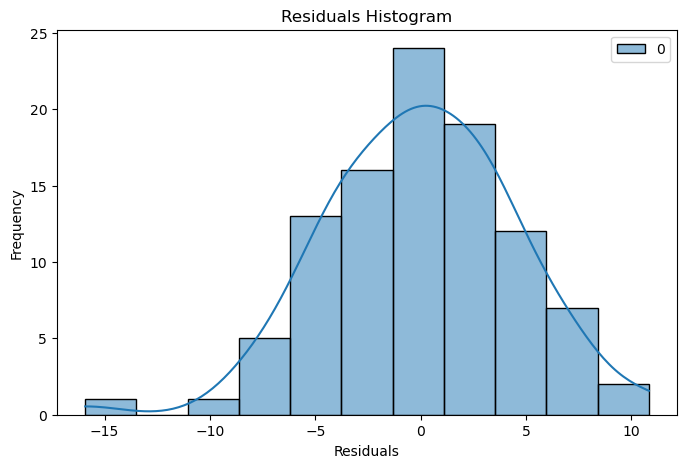

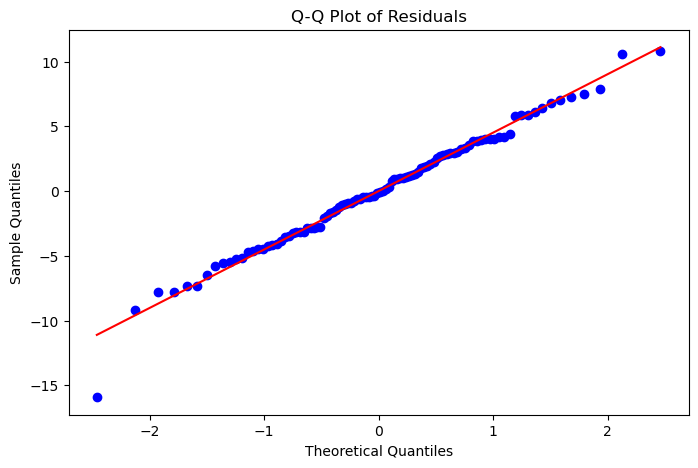

In [15]:
# histograms
plt.figure(figsize = (8,5))
sns.histplot(residuals,kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# QQ plot
from scipy import stats

plt.figure(figsize = (8,5))
stats.probplot(residuals.flatten(),plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Residual mean: 0.0000


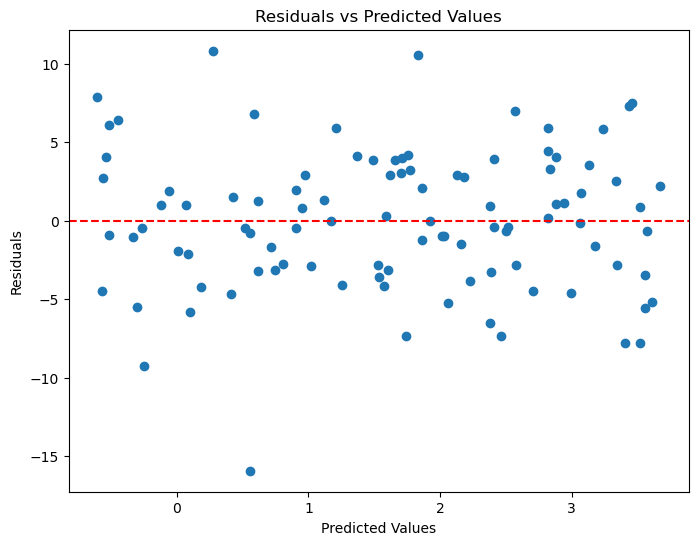

In [16]:
residuals_means = np.mean(residuals)
print(f"Residual mean: {residuals_means:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_pred,residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

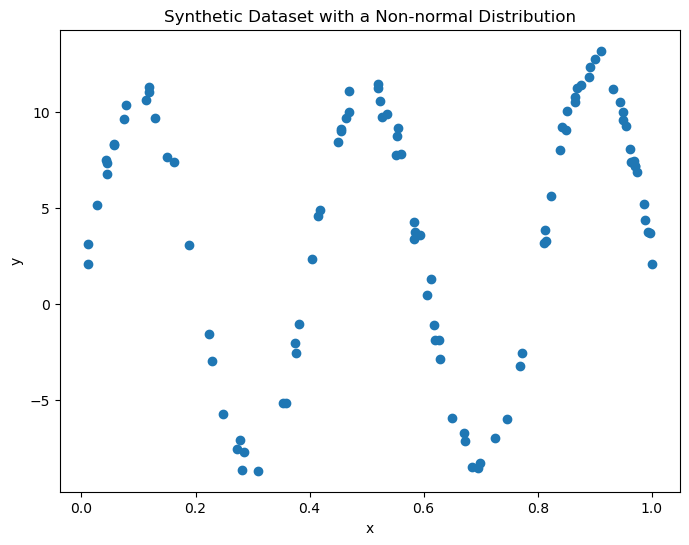

In [17]:
# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Dataset with a Non-normal Distribution')
plt.show()

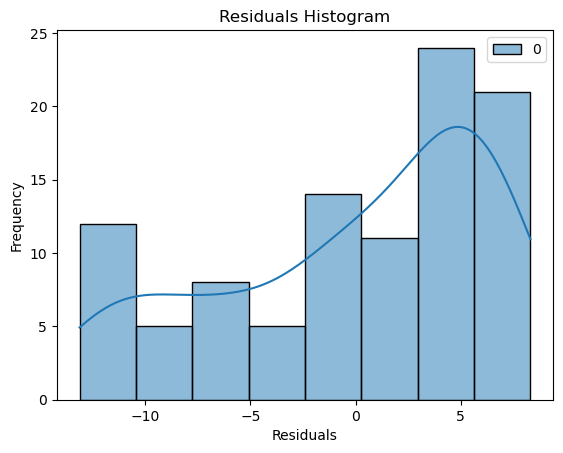

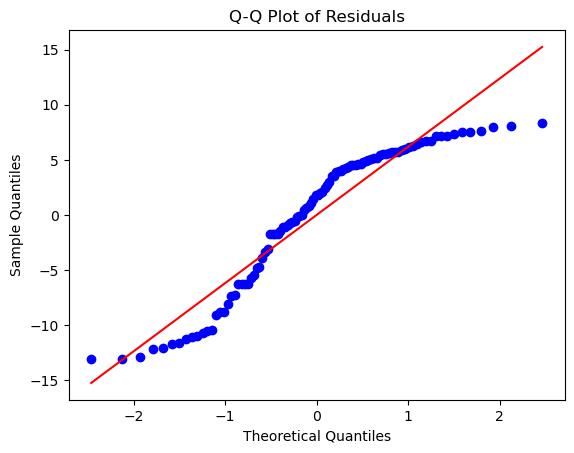

In [18]:
model5 = LinearRegression()
model5.fit(x,y)
y_pred = model5.predict(x)
residuals = y - y_pred

# histogram 
sns.histplot(residuals,kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

stats.probplot(residuals.flatten(),plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

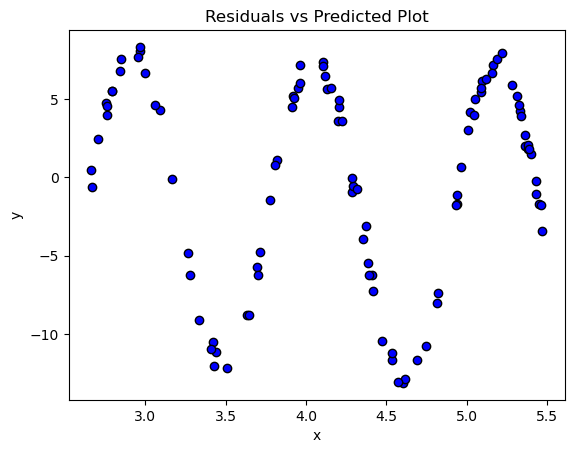

In [19]:
plt.scatter(y_pred,residuals,c="blue",ec="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Residuals vs Predicted Plot')
plt.show()

### Omnibus Test

In [23]:
skew = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_statics,omnibus_p_value = stats.normaltest(residuals)
print(f"Skew : {skew[0]:.2f}, \nKurtosis : {kurtosis[0]:.2f}, \nOmnibus statistics : {omnibus_statics[0]:.2f}, \nOmnibus test p value : {omnibus_p_value[0]:.2f}")

Skew : -0.64, 
Kurtosis : -0.87, 
Omnibus statistics : 14.70, 
Omnibus test p value : 0.00


##  3. Homoscedasticity
The spread of the error terms(residuals) should be constant across all level of the independent variables, if spread change it leads to hetroscedasticity

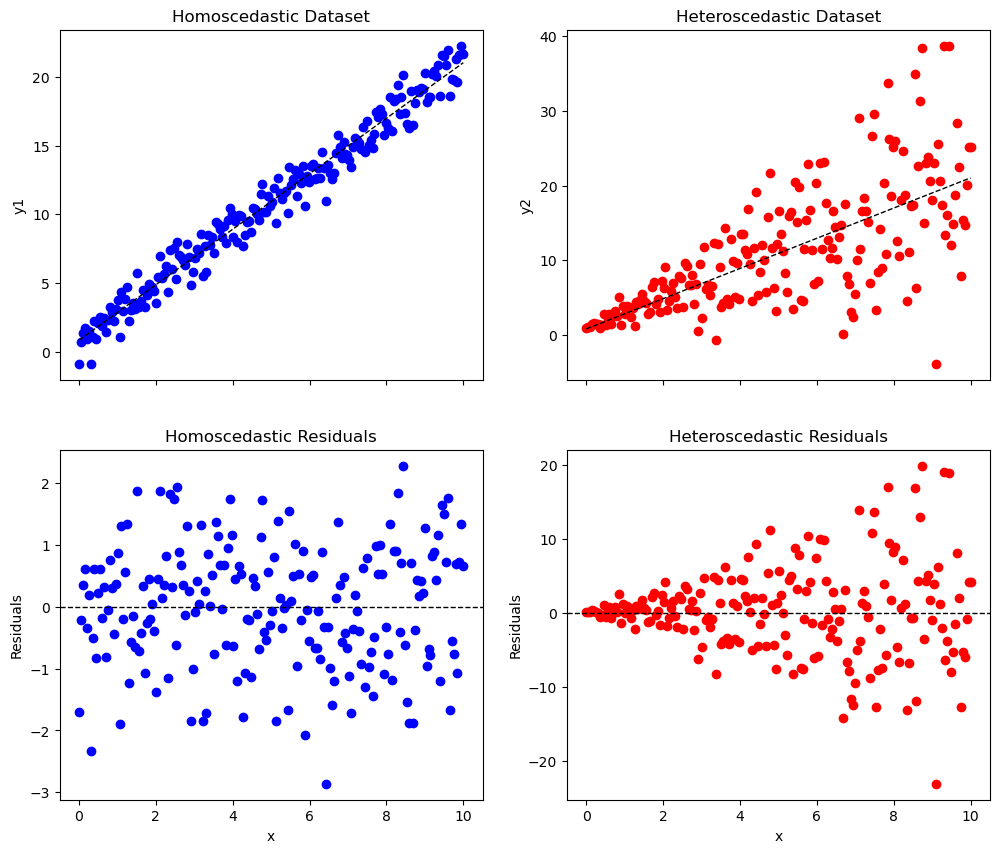

In [27]:
x = np.linspace(0,10,200)


# homoscedastic dataset
y1 = 2*x + 1 + np.random.normal(0,1,len(x))

# hetrosdastic dataset
y2 = 2*x + 1 + np.random.normal(0,x,len(x))
x = x.reshape(-1,1)

# fitting linear model
hm_model = LinearRegression()
hm_model.fit(x,y1)
hm_pred = hm_model.predict(x)
hm_residual = y1 - hm_pred

ht_model = LinearRegression()
ht_model.fit(x,y2)
ht_pred = hm_model.predict(x)
ht_residual = y2 - ht_pred

# Plot datasets and residuals
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Plot dataset 1
axes[0, 0].scatter(x, y1, color='blue')
axes[0, 0].plot(x, hm_pred, color='black', linestyle='--', lw=1)
axes[0, 0].set_title('Homoscedastic Dataset')
axes[0, 0].set_ylabel('y1')

# Plot dataset 2
axes[0, 1].scatter(x, y2, color='red')
axes[0, 1].plot(x, ht_pred, color='black', linestyle='--', lw=1)
axes[0, 1].set_title('Heteroscedastic Dataset')
axes[0, 1].set_ylabel('y2')

# Plot residuals for dataset 1
axes[1, 0].scatter(x, hm_residual, color='blue')
axes[1, 0].axhline(0, color='black', linestyle='--', lw=1)
axes[1, 0].set_title('Homoscedastic Residuals')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Residuals')

# Plot residuals for dataset 2
axes[1, 1].scatter(x, ht_residual, color='red')
axes[1, 1].axhline(0, color='black', linestyle='--', lw=1)
axes[1, 1].set_title('Heteroscedastic Residuals')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Residuals')

plt.show()

###  Breusch-Pagan Test

In [33]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# fit linear model
x_with_constant1 = sm.add_constant(x)
b_model = sm.OLS(y1,x_with_constant1).fit()

x_with_constant2 = sm.add_constant(x)
b_model0 = sm.OLS(y2,x_with_constant2).fit()

# Perform Breusch-Pagan test
bp_test1 = het_breuschpagan(b_model.resid,x_with_constant1)
bp_test2 = het_breuschpagan(b_model0.resid,x_with_constant2)

print("=======================================================")
print("Homoscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test1[0]}\nLM-Test p-value: {bp_test1[1]}\nF-Statistic: {bp_test1[2]}\nF-Test p-value: {bp_test1[3]}\n")

print("--------------------------------------------------------")
print("Heteroscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test2[0]}\nLM-Test p-value: {bp_test2[1]}\nF-Statistic: {bp_test2[2]}\nF-Test p-value: {bp_test2[3]}")
print("=======================================================")

Homoscedastic dataset - Breusch-Pagan test results:
LM Statistic: 1.2113652985836998
LM-Test p-value: 0.2710618964799467
F-Statistic: 1.206559567551894
F-Test p-value: 0.27334846858339173

--------------------------------------------------------
Heteroscedastic dataset - Breusch-Pagan test results:
LM Statistic: 34.43016268570418
LM-Test p-value: 4.4182295043941205e-09
F-Statistic: 41.17399837041945
F-Test p-value: 1.0055227289512527e-09


### WLS (Weighted Least Square)

In [41]:
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, (0.5 * x) ** 2, len(x))

# scale the independent variable
from sklearn.preprocessing import StandardScaler
scalor = StandardScaler()
x_scaled = scalor.fit_transform(x.reshape(-1,1))

# fiting linear model
x_scaled_constant = sm.add_constant(x_scaled)
model_ols = sm.OLS(y,x_scaled_constant).fit()

# calculated square residuals and from it weight
sq_residuals = model_ols.resid **2
weights = 1 / (sq_residuals + 1e-6)

# fitting wls model
model_wls = sm.WLS(y,x_scaled_constant,weights=weights).fit()

# Print the model summaries
print("OLS Model Summary")
print("|||||||||||||||||||")
print(model_ols.summary())
print("\nWLS Model Summary")
print("|||||||||||||||||||")
print(model_wls.summary())


OLS Model Summary
|||||||||||||||||||
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     27.05
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.09e-06
Time:                        12:51:28   Log-Likelihood:                -383.90
No. Observations:                 100   AIC:                             771.8
Df Residuals:                      98   BIC:                             777.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

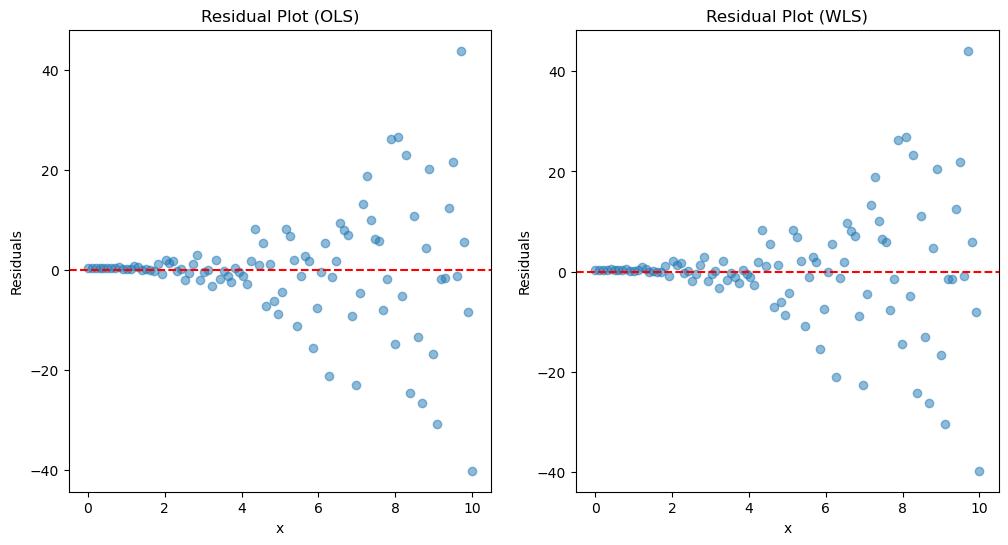

In [42]:
# Plot the residual plots for OLS and WLS
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, model_ols.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot (OLS)')

plt.subplot(1, 2, 2)
plt.scatter(x, model_wls.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot (WLS)')

plt.show()

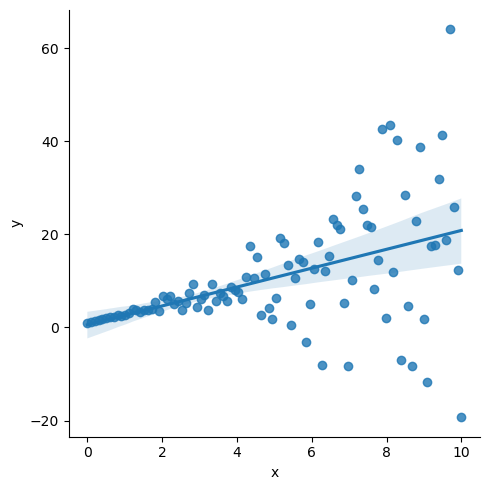

In [49]:
data = {"x":x,"y":y}
df = pd.DataFrame(data)

sns.lmplot(data =df,x="x",y="y",ci=95)
plt.show()